In [46]:
import pandas as pd
from yahoofinancials import YahooFinancials as YF
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import datetime as dt

In [171]:
rts = {}
prs = {}
for t in ['^GSPC','TLT','GD=F','^FVX']:
    asset = yf.Ticker(t)
    asset_price = asset.history(start='1980-01-01')['Close']
    asset_return = asset_price / asset_price.shift(21) - 1
    prs[t] = asset_price
    rts[t] = asset_return
    
all_returns = pd.DataFrame(rts).dropna()
print(all_returns.head())

                              ^GSPC       TLT      GD=F      ^FVX
Date                                                             
2006-04-13 00:00:00-04:00 -0.010668 -0.040308  0.085321  0.056491
2006-04-17 00:00:00-04:00 -0.015322 -0.045431  0.094318  0.070527
2006-04-18 00:00:00-04:00  0.000023 -0.040835  0.116818  0.053019
2006-04-19 00:00:00-04:00  0.003716 -0.048210  0.161637  0.063599
2006-04-20 00:00:00-04:00  0.010970 -0.044057  0.141865  0.049499


(4040, 5)


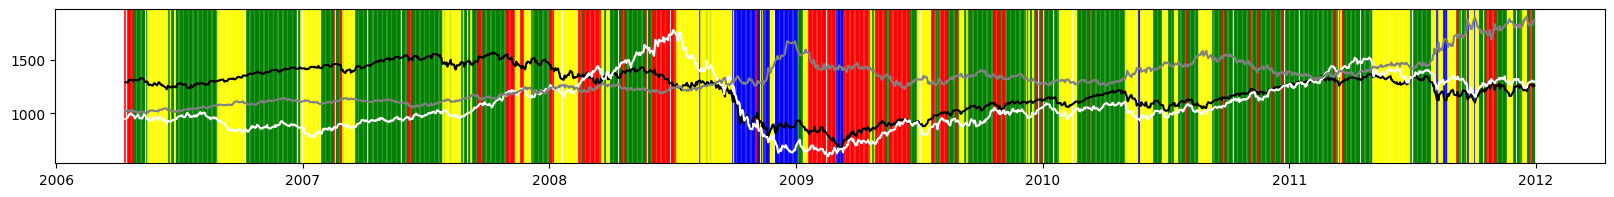

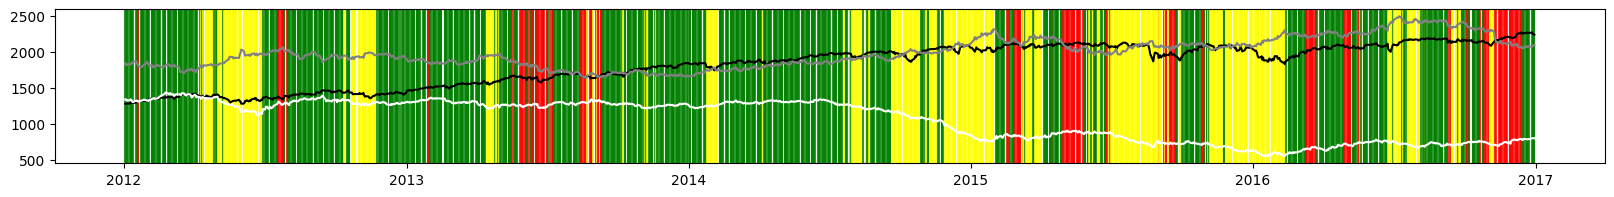

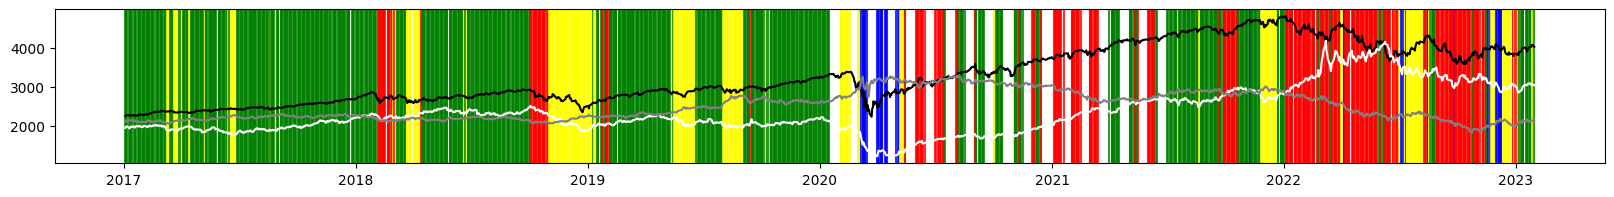

In [173]:
##GMM
gmm = GaussianMixture(4, covariance_type= 'full',  random_state = 1).fit(all_returns.iloc[:,:-1])
labels = gmm.predict(all_returns.iloc[:,:-1])
result = all_returns.copy()
result['regime'] = labels
result['regime'].replace([0,1,2,3],['red','yellow','blue','green'],inplace=True)
print(result.shape)
plt.figure(figsize = (20,2))
for i,r in result.loc[:'2011-12-31',:].iterrows():    
    plt.axvline(x = i , c = r['regime'],alpha = 0.8)
plt.plot(prs['^GSPC'].loc['2006-04-13':'2011-12-31'],color = 'black')
plt.plot(prs['GD=F'].loc['2006-04-13':'2011-12-31']*2,color = 'white')
plt.plot(prs['TLT'].loc['2006-04-13':'2011-12-31']*20,color = 'grey')

plt.figure(figsize = (20,2))    
for i,r in result.loc['2011-12-31':'2017-01-01',:].iterrows():    
    plt.axvline(x = i , c = r['regime'],alpha = 0.8)
plt.plot(prs['^GSPC'].loc['2011-12-31':'2017-01-01'],color = 'black')
plt.plot(prs['GD=F'].loc['2011-12-31':'2017-01-01']*2,color = 'white')
plt.plot(prs['TLT'].loc['2011-12-31':'2017-01-01']*20,color = 'grey')

plt.figure(figsize = (20,2))
for i,r in result.loc['2017-01-01':,:].iterrows():    
    plt.axvline(x = i , c = r['regime'],alpha = 0.8)
plt.plot(prs['^GSPC'].loc['2017-01-01':],color = 'black')
plt.plot(prs['GD=F'].loc['2017-01-01':]*5,color = 'white')
plt.plot(prs['TLT'].loc['2017-01-01':]*20,color = 'grey')


In [174]:
help()

Type help() for interactive help, or help(object) for help about object.

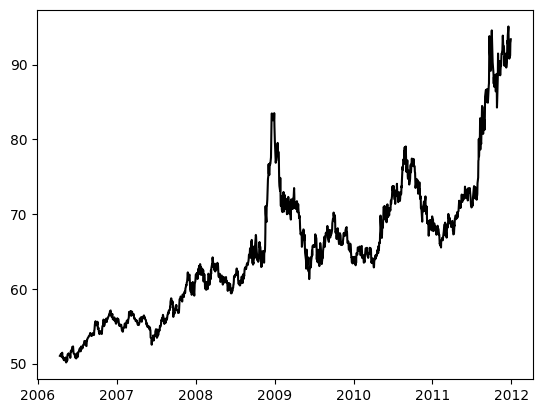

In [166]:
plt.plot(prs['TLT'].loc['2006-04-13':'2011-12-31'],color = 'black')
